In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [44]:
import numpy as np
from numpy.random import binomial
#probability 0< f <= 0.5
f = 0.5

#number of neurons
N = 100

#Decision boundary (arbitrary and held constant)
T = 5

#Robustness
#Either defined with K, or with rho
"""
K = T/10
wAverage = T/(f*N)
# for different rescaled robustness parameters:
rho =K / (wAverage * np.sqrt(f*(1-f)*N))
"""
wAverage = T/(f*N)
rho = 4.
K = rho * wAverage * np.sqrt(f*(1-f)*N)

kappa = K/np.sqrt(N)



In [45]:
w[0,1]

0.59999999999999998

In [46]:
w[1,0]

0.17500000000000002

In [47]:
"""#Code de Vincent : replica-cavity.ipynb
#Changement de notation p -> p_eps

#For defining alpha_c
##The critical capacity is given by alpha_c != 2 = p/N as N tends towards infinity

from scipy.optimize import fsolve
from scipy.stats import norm

#TODO
kappa_tilde = 1.


#1- Get M_tilde via Eq. (22)
def p_eps(eps):
    return f*eps + (1-eps)/2
func = lambda x: np.sum([p_eps(eps) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])
M_tilde_initial_guess = 0.5
M_tilde = fsolve(func, M_tilde_initial_guess)



def G(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

#2- Get tau_eps via Eq. (15)
def tau(eps):
    return -kappa_tilde + eps*f*M_tilde


def H(x):
    return 1 - norm.cdf(x, loc=0, scale=1)

#3- Get B via Eq. (27)
func = lambda x: ((1+x**2)*H(x)-x*G(x))/H(x) - np.sum([(f*eps + (1-eps)/2) * H(eps) for eps in [-1,1]]) / np.sum([(f*eps + (1-eps)/2) * ((1+tau(eps)**2)* H(tau(eps)) - tau(eps)*G(tau(eps))) for eps in [-1,1]])
B_initial_guess = 0.5
B = fsolve(func, B_initial_guess)

alpha_c = H(B) / np.sum([p_eps(eps) * H(tau(eps)) for eps in [-1,1]])
"""

'#Code de Vincent : replica-cavity.ipynb\n#Changement de notation p -> p_eps\n\n#For defining alpha_c\n##The critical capacity is given by alpha_c != 2 = p/N as N tends towards infinity\n\nfrom scipy.optimize import fsolve\nfrom scipy.stats import norm\n\n#TODO\nkappa_tilde = 1.\n\n\n#1- Get M_tilde via Eq. (22)\ndef p_eps(eps):\n    return f*eps + (1-eps)/2\nfunc = lambda x: np.sum([p_eps(eps) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])\nM_tilde_initial_guess = 0.5\nM_tilde = fsolve(func, M_tilde_initial_guess)\n\n\n\ndef G(x):\n    return np.exp(-x**2/2)/np.sqrt(2*np.pi)\n\n#2- Get tau_eps via Eq. (15)\ndef tau(eps):\n    return -kappa_tilde + eps*f*M_tilde\n\n\ndef H(x):\n    return 1 - norm.cdf(x, loc=0, scale=1)\n\n#3- Get B via Eq. (27)\nfunc = lambda x: ((1+x**2)*H(x)-x*G(x))/H(x) - np.sum([(f*eps + (1-eps)/2) * H(eps) for eps in [-1,1]]) / np.sum([(f*eps + (1-eps)/2) * ((1+tau(eps)**2)* H(tau(eps)) - tau(eps)*G(t

In [48]:
#number of random patterns
#http://www.cell.com/cms/attachment/572560/4239133/mmc1.pdf
#the choice of alpha_c = H(B)/[f'H(tauMinus) + (1-f')H(tauPlus)]
#Like in Gutfreund and Stein (1990), we suppose f'=f


def generate_data():
    eta = binomial(1,f,(1,N))
    return(eta)

In [49]:
def testLearn(training_data, w):
    for mu in range(training_data.shape[0]):
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i]
            expected = training_data[mu,i]
            result = dot(x, wi)
            if unit_step(result) != expected:
                return False
    return True

In [50]:
#Network storing fixed-point attractors

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i]
            expected = training_data[mu,i]
            result = dot(wi, x)
            if (2*expected - 1)*(result - T) <= K:
                wi += l_rate * (2*expected - 1) * x
                #Non-negativity constraint
                w[i,np.arange(training_data.shape[1])!=i] = (wi>0) * wi

        converged = testLearn(training_data, w)
        iteration += 1
    if converged:
        print("converged")
        training_data = np.vstack((training_data,generate_data()))
    else:
        print("not")
        l_rate /= 2
    print(training_data.shape[0])

converged
2
converged
3
converged
4
converged
5
converged
6
converged
7
converged
8
converged
9
converged
10
converged
11
converged
12
converged
13
converged
14
converged
15
converged
16
converged
17
converged
18
converged
19
converged
20
not
20
converged
21
converged
22
converged
23
converged
24
converged
25
converged
26
not
26
converged
27
converged
28
converged
29
converged
30
converged
31
converged
32
converged
33
converged
34
not
34
converged
35
converged
36
converged
37
converged
38
converged
39
converged
40
converged
41
converged
42
converged
43
converged
44
converged
45
converged
46
not
46
converged
47
converged
48
converged
49
converged
50
converged
51
converged
52


KeyboardInterrupt: 

In [ ]:
np.save("w.npy", w)
np.save("training_data.npy", training_data)

In [74]:
import numpy as np
w = np.load("w.npy")
training_data = np.load("training_data.npy")

In [172]:
# Network storing sequences

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

#No dummy, because the decision boundary stays in the unit_step function
training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*
for mu in range(training_data.shape[0]-1):
    x = training_data[mu,:]
    for i in range(training_data.shape[1]):
        
        # Only differences with fixed-point attractors
        wi = w[i,:]
        expected = training_data[mu+1,i]
        result = dot(wi, x)
        
        if (2*expected - 1)*(result - T) <= kappa:
            wi += l_rate * (2*expected - 1) * x
            #Non-negativity constraint
            w[i,:] = (wi>0) * wi
            

for mu in range(training_data.shape[0]-1):
    x = training_data[mu,:]
    for i in range(training_data.shape[1]):
        expected = training_data[mu+1,i]
        wi = w[i,:]
        result = dot(x, wi)
        if mu < 1:
            if i < 5:
                print("{}: {} -> {}".format(expected, result, unit_step(result)))

SyntaxError: invalid syntax (<ipython-input-172-3f0af303098e>, line 17)

## Distribution of synaptic weights

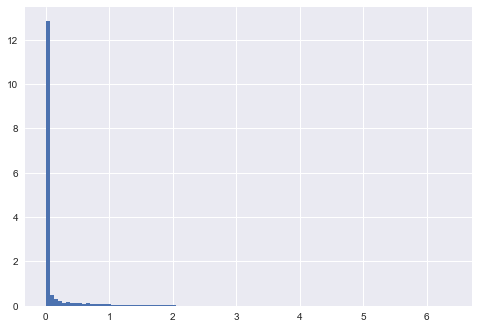

In [173]:
#Figure 2.a
plt.hist(w.flatten(), bins = 100, normed = True)
plt.show()

In [174]:
# Figure 2.b
# distribution synaptic weights (histogram)

print(rho)
connectionProba = (w>0).sum()/(N*N)
print(connectionProba)

4.0
0.4218


## Statistics of two-neuron bidirectional connectivity

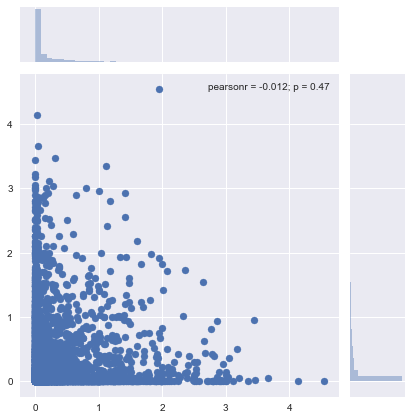

In [39]:
#Figure 3A

import seaborn as sns

sns.jointplot(w[w>0], w.T[w.T>0], kind = 'scatter')

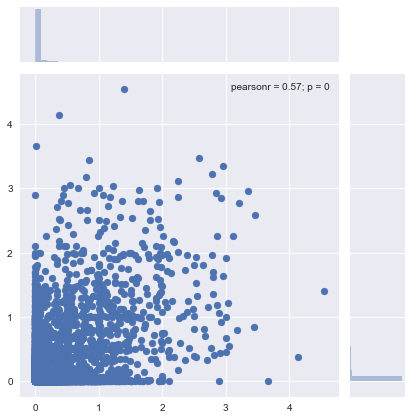

In [43]:
sns.jointplot(w, w.T, kind = 'scatter')

TypeError: slice indices must be integers or None or have an __index__ method

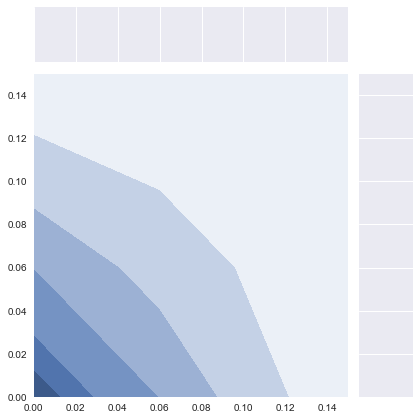

In [158]:
import seaborn as sns

sns.jointplot(w, w.T, kind = 'kde', xlim=(0,0.15), ylim =(0,0.15))

TypeError: only integer scalar arrays can be converted to a scalar index

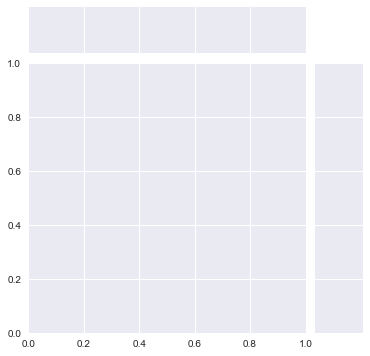

In [26]:
sns.jointplot([w[i,j] for i in range(w.shape[0]) for j in range(w.shape[1])], [w[j,i] for i in range(w.shape[0]) for j in range(w.shape[1])]).plot_joint(sns.kdeplot, zorder=100, n_levels=100)

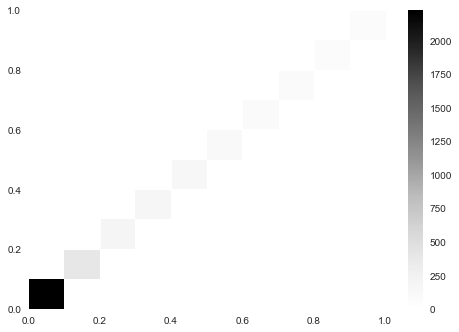

In [30]:
plt.hist2d(w[w>0].ravel(), w[w>0].T.ravel(), bins = 10, range = np.array([[0,1],[0,1]]))
plt.colorbar()

In [160]:
#Construction of an erdos-renyi network.
#

import networkx

randomGraph = networkx.gnm_random_graph(N, (w>0).sum(), directed = True)


In [161]:
randomWeights = np.zeros((N,N))
for coordinate in randomGraph.edges():
    randomWeights[coordinate] = 1.

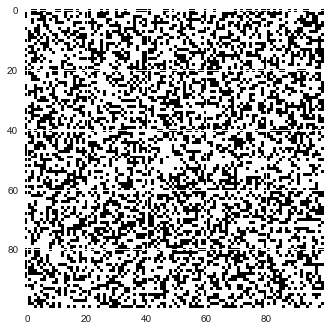

In [163]:
plt.imshow(randomWeights)

In [24]:
#Figure 3b

countReciprocal = (w*w.T>0).sum()
countReciprocalER = (randomWeights*randomWeights.T>0).sum()
print(countReciprocal/countReciprocalER)

1.2338263997


In [30]:
#Figure 4b

#Random symmetric : plot y=x
#Random assymmetric : plot y=x^2

reciprocalProba = countReciprocal/(N*N)
print(reciprocalProba)
print(connectionProba)

0.45009
0.603617


## Degree distributions

In [ ]:
Majorityness = []
for i in range(training_data.shape[1]):
    Majorityness.append(np.sum(training_data[:,i:i+1]*training_data)/(f*N*np.sum(training_data[:,i])))

## Inhibition model

Model 1

In [ ]:
wInhib = 1.

In [ ]:
#Network storing fixed-point attractors

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i] - wInhib * T / (f*N)
            expected = training_data[mu,i]
            result = dot(wi, x)
            if (2*expected - 1)*(result - T) <= K:
                wi += l_rate * (2*expected - 1) * x
                #Non-negativity constraint
                w[i,np.arange(training_data.shape[1])!=i] = wi
                wTemp = w[i,np.arange(training_data.shape[1])!=i]
                (w[i,np.arange(training_data.shape[1])!=i])[wTemp < -T/(f*N)] = -T/(f*N)
                
        converged = testLearn(training_data, w)
        iteration += 1
    if converged:
        print("converged")
        training_data = np.vstack((training_data,generate_data()))
    else:
        print("not")
        l_rate /= 2
    print(training_data.shape[0])

Model 2

In [ ]:
NI = int(N/4)
fI = 0.5

Variant 1

In [ ]:
wEI = random.unif(0,2 * (1 + wInhib) * T / (f*N),(N,NI))
wII = random.unif(0,2 * wInhib * T / (fI*NI),(NI,NI))
wIE = random.unif(0,2 * wInhib * T / (fI*NI),(NI,N))

Variant 2

In [ ]:
wEI = random.unif(0,2 * (1 + wInhib) * T / (f*N),(N,NI))
wII = random.unif(0,2 * wInhib * T / (fI*NI),(NI,NI))
wIE = random.unif(0,2 * wInhib * T / (fI*NI),(NI,N))

#plastic IE

#Constraint of constant mean excitatory and inhibitory weights 

In [ ]:
#Network storing fixed-point attractors

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i]
            expected = training_data[mu,i]
            result = dot(wi, x)
            if (2*expected - 1)*(result - T) <= K:
                wi += l_rate * (2*expected - 1) * x
                #Non-negativity constraint
                w[i,np.arange(training_data.shape[1])!=i] = (wi>0) * wi

        converged = testLearn(training_data, w)
        iteration += 1
    if converged:
        print("converged")
        training_data = np.vstack((training_data,generate_data()))
    else:
        print("not")
        l_rate /= 2
    print(training_data.shape[0])

Variant 3